# 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액
* 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

### K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?
* K-Beauty란? [K-Beauty - Wikipedia](https://en.wikipedia.org/wiki/K-Beauty)
* e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연 ( 단위 : 백만원 )

## 필요 라이브러리 가져오기

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# os 별로 폰트를 다르게 설정해 줍니다.
if os.name == "posix":
    # Mac
    sns.set(font="AppleGothic")
elif os.name == "nt":
    # Window
    sns.set(font="Malgun Gothic")

In [2]:
from IPython.display import set_matplotlib_formats

# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
set_matplotlib_formats('retina')

## 데이터 로드하기

In [3]:
df_raw = pd.read_csv("data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20200123115228.csv", encoding="cp949")
df_raw.shape

(450, 26)

In [4]:
df_raw["국가(대륙)별"].value_counts()

대양주           45
미국            45
중남미           45
중동            45
일본            45
중국            45
아세안(ASEAN)    45
EU            45
합계            45
기타            45
Name: 국가(대륙)별, dtype: int64

In [5]:
df_raw[df_raw["국가(대륙)별"] == "미국"].head()

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2017 2/4,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4 p)
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,40976,41927,53209,41204,39108,36536,47981,39995,43443,51945
46,미국,합계,면세점,-,-,-,-,-,-,-,...,9183,9469,12177,5184,3603,2317,2071,2657,2951,1818
47,미국,합계,직접·간접,-,-,-,-,-,-,-,...,31793,32458,41032,36020,35505,34219,45910,37338,40492,50127
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,946,791,854,696,567,773,854,621,646,912
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0


## 분석과 시각화를 위한 tidy data 만들기

In [6]:
df = df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"], var_name="기간", value_name="million")
df

,국가(대륙)별,상품군별,판매유형별,기간,million
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,직접·간접,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-
...,...,...,...,...,...
10345,기타,생활용품 및 자동차용품,면세점,2019 3/4 p),0
10346,기타,생활용품 및 자동차용품,직접·간접,2019 3/4 p),308
10347,기타,기 타,계,2019 3/4 p),469
10348,기타,기 타,면세점,2019 3/4 p),0


In [7]:
df["연도"] = df["기간"].map(lambda x: x.split()[0])
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,직접·간접,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014
...,...,...,...,...,...,...
10345,기타,생활용품 및 자동차용품,면세점,2019 3/4 p),0,2019
10346,기타,생활용품 및 자동차용품,직접·간접,2019 3/4 p),308,2019
10347,기타,기 타,계,2019 3/4 p),469,2019
10348,기타,기 타,면세점,2019 3/4 p),0,2019


In [8]:
int("2019 3/4 p)".split()[1].split("/")[0])

3

In [9]:
df["분기"] = df["기간"].apply(lambda  x : x.split()[1].split("/")[0])
df["분기"] = df["분기"].astype(int)
df["연도"] = df["연도"].astype(int)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,직접·간접,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


In [10]:
df["million"] = df["million"].replace("-", pd.np.nan).astype(float)
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,직접·간접,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
10345,기타,생활용품 및 자동차용품,면세점,2019 3/4 p),0.0,2019,3
10346,기타,생활용품 및 자동차용품,직접·간접,2019 3/4 p),308.0,2019,3
10347,기타,기 타,계,2019 3/4 p),469.0,2019,3
10348,기타,기 타,면세점,2019 3/4 p),0.0,2019,3


In [11]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거합니다.
df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계") & (df["판매유형별"] != "계")].copy()
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,직접·간접,2014 1/4,NaN,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1
53,미국,가전·전자·통신기기,직접·간접,2014 1/4,NaN,2014,1
55,미국,소프트웨어,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
10343,기타,농축수산물,직접·간접,2019 3/4 p),0.0,2019,3
10345,기타,생활용품 및 자동차용품,면세점,2019 3/4 p),0.0,2019,3
10346,기타,생활용품 및 자동차용품,직접·간접,2019 3/4 p),308.0,2019,3
10348,기타,기 타,면세점,2019 3/4 p),0.0,2019,3


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5796 entries, 49 to 10349
Data columns (total 7 columns):
국가(대륙)별    5796 non-null object
상품군별       5796 non-null object
판매유형별      5796 non-null object
기간         5796 non-null object
million    2772 non-null float64
연도         5796 non-null int64
분기         5796 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 362.2+ KB


In [13]:
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
million    3024
연도            0
분기            0
dtype: int64

## 전체 상품군 판매액

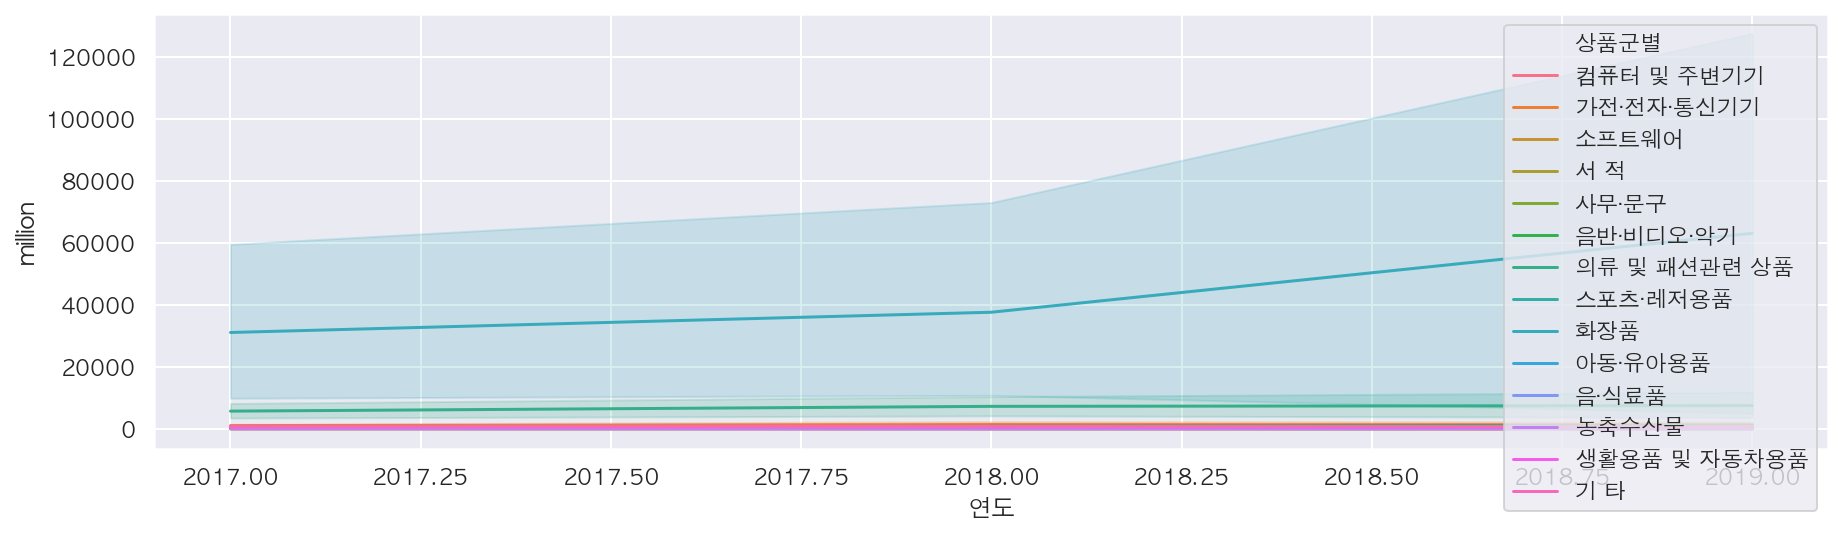

In [14]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="연도", y="million", data=df, hue="상품군별")

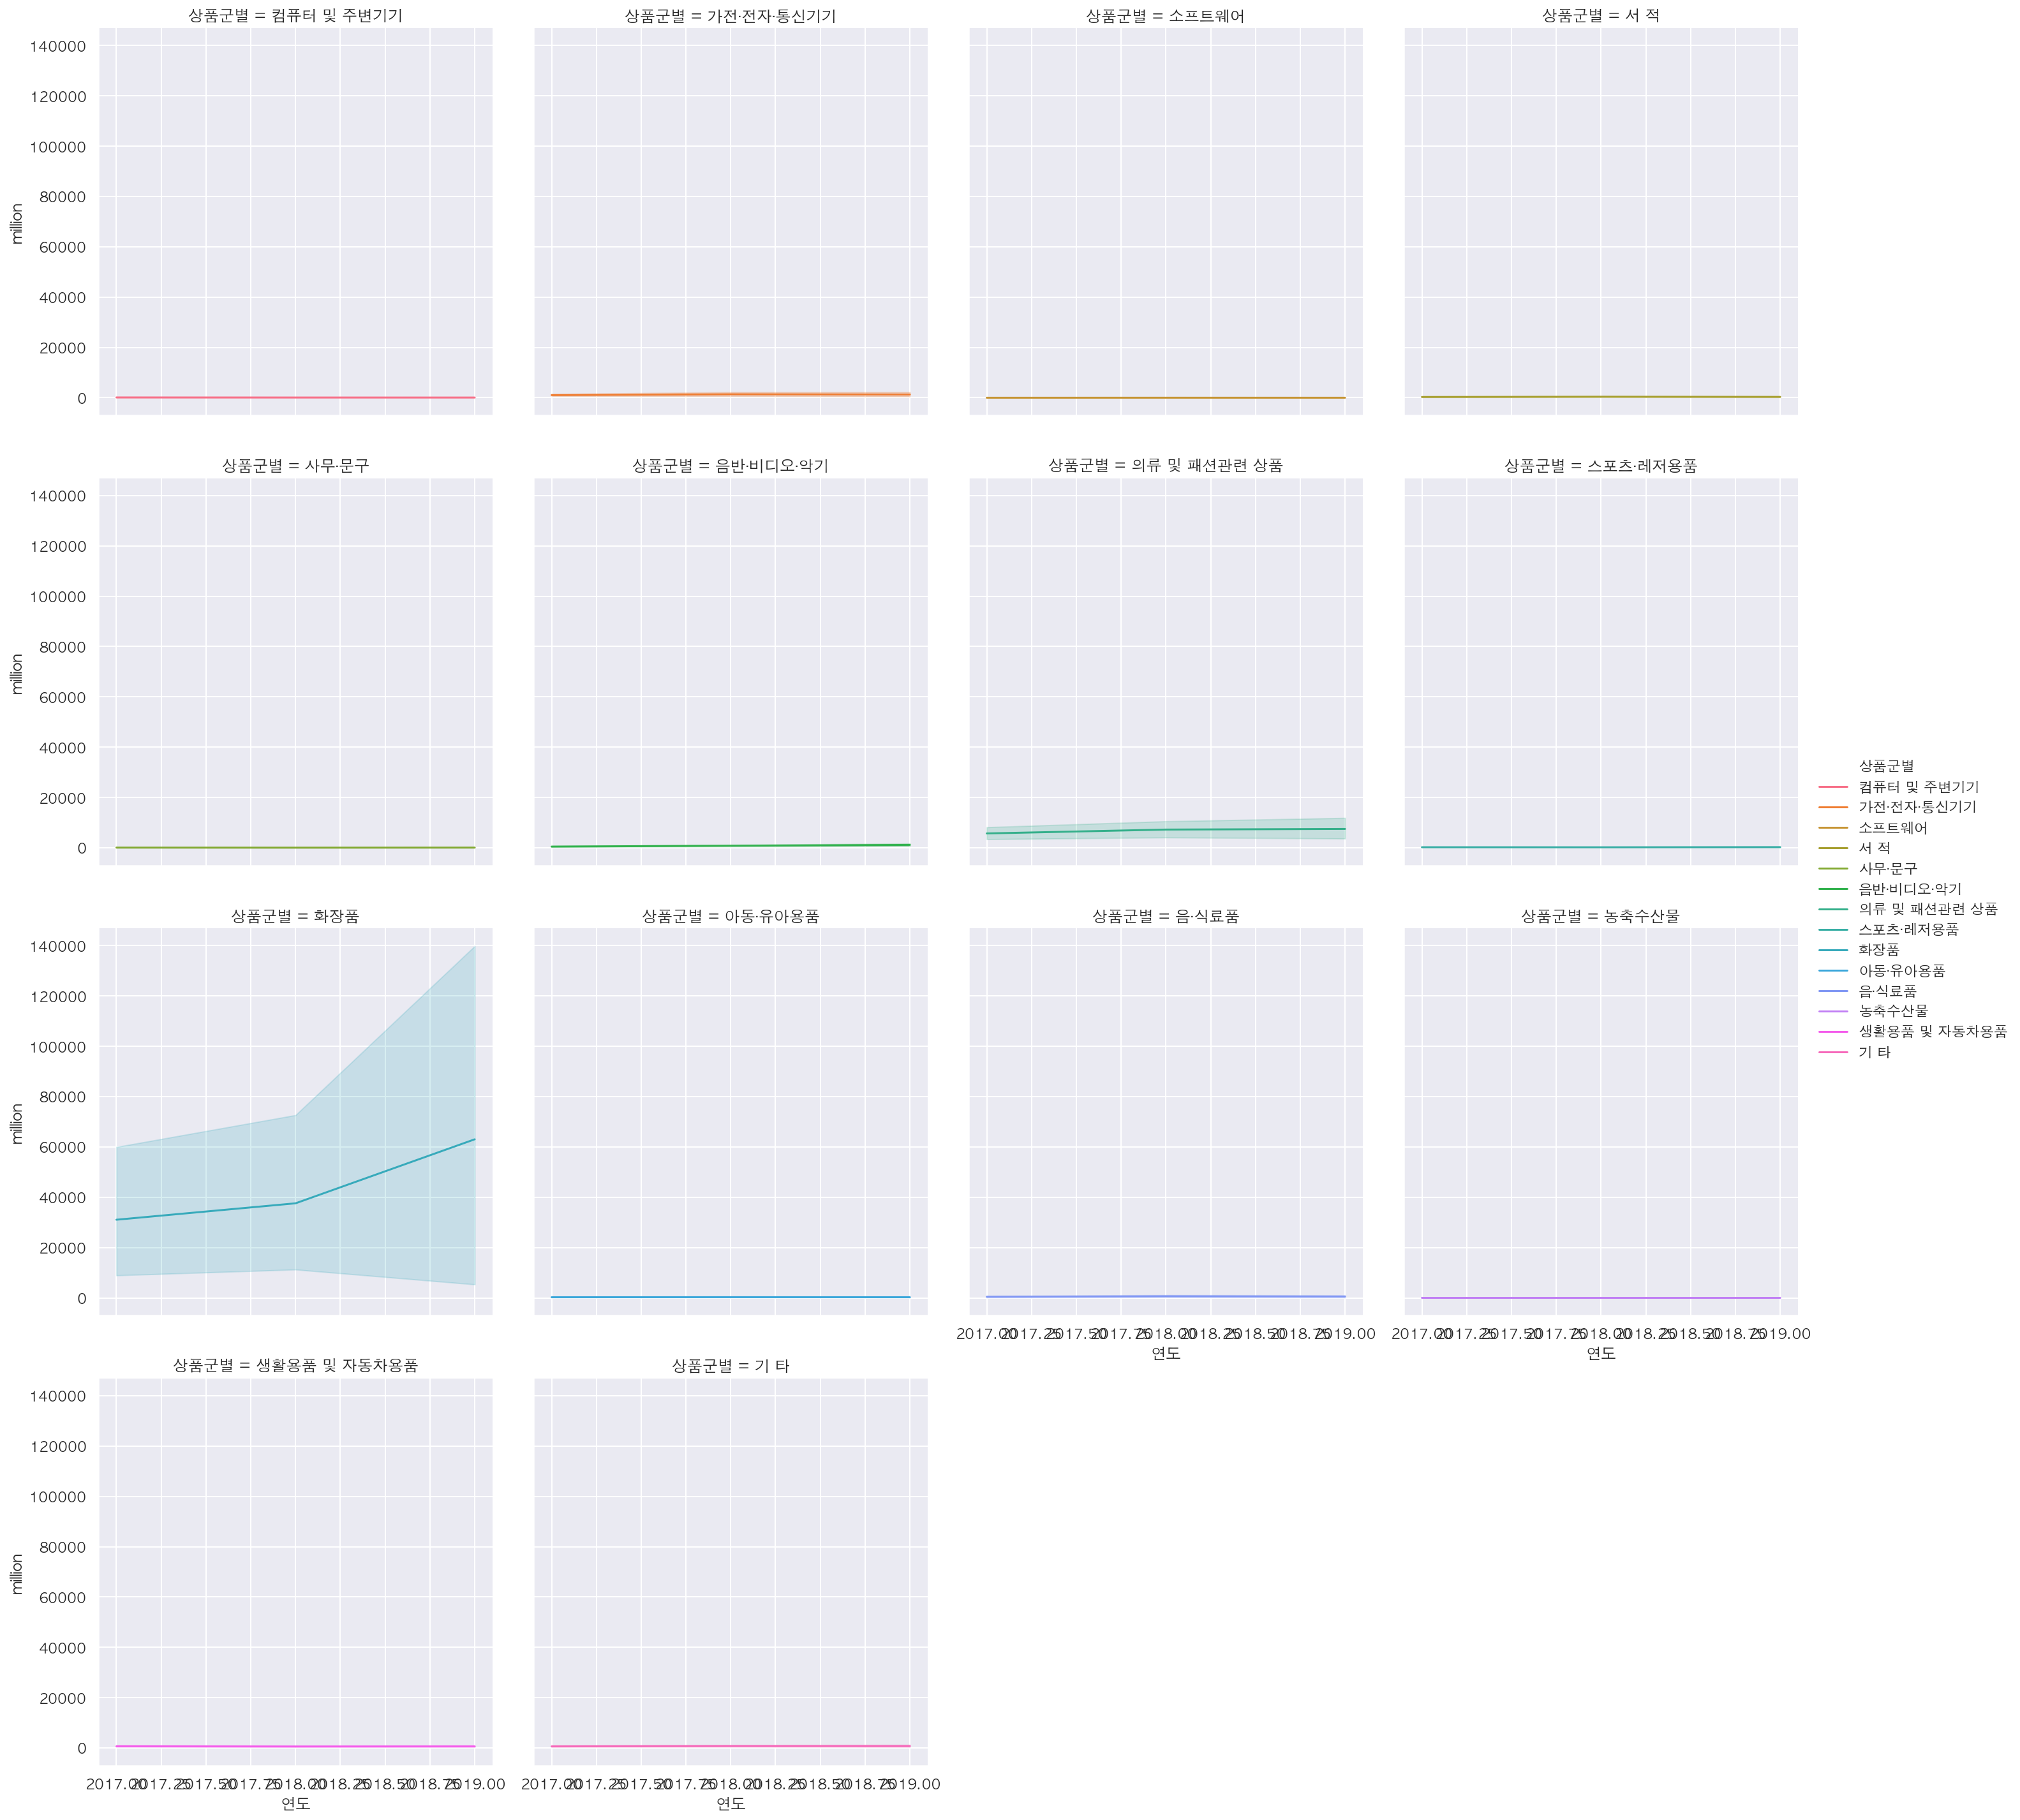

In [15]:
sns.relplot(x="연도", y="million", data=df, hue="상품군별", col="상품군별", col_wrap=4, kind="line")

In [16]:
df_sub =  df[~df["상품군별"].isin(["화장품"])]
df_sub

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,직접·간접,2014 1/4,NaN,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1
53,미국,가전·전자·통신기기,직접·간접,2014 1/4,NaN,2014,1
55,미국,소프트웨어,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
10343,기타,농축수산물,직접·간접,2019 3/4 p),0.0,2019,3
10345,기타,생활용품 및 자동차용품,면세점,2019 3/4 p),0.0,2019,3
10346,기타,생활용품 및 자동차용품,직접·간접,2019 3/4 p),308.0,2019,3
10348,기타,기 타,면세점,2019 3/4 p),0.0,2019,3


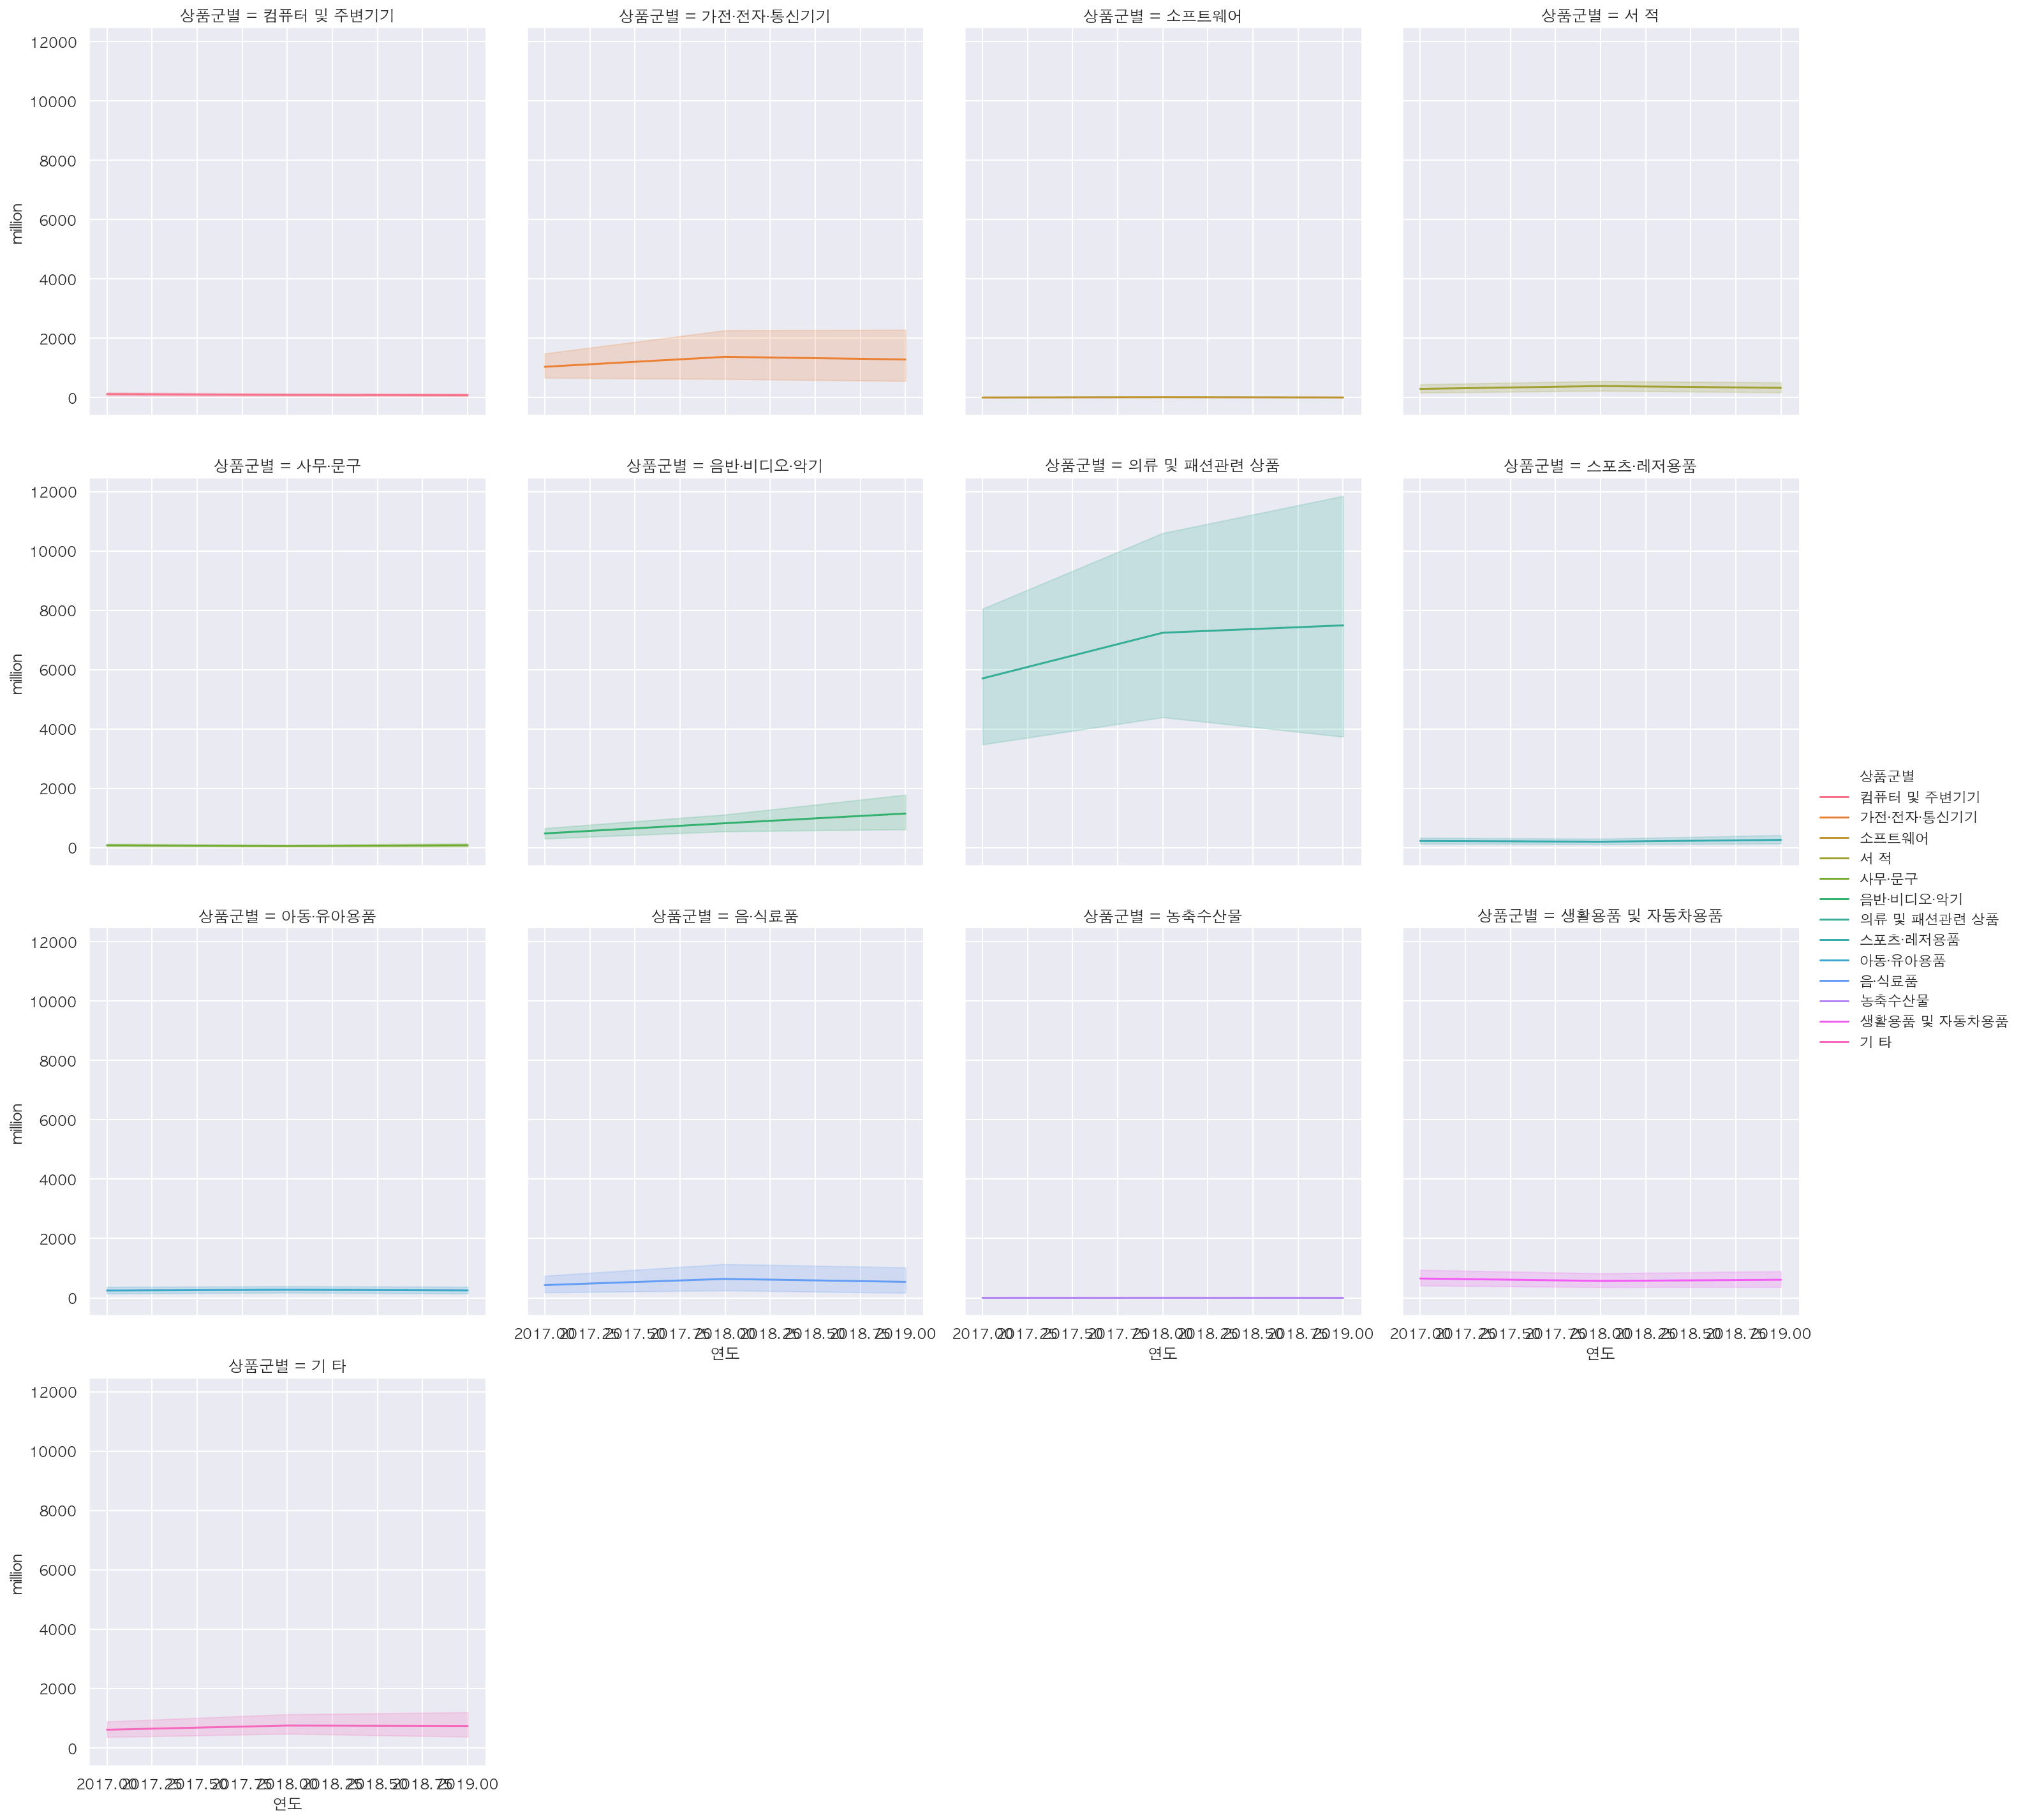

In [17]:
sns.relplot(x="연도", y="million", data=df_sub, 
            hue="상품군별", col="상품군별", col_wrap=4, kind="line")

## 화장품의 온라인쇼핑 해외직접판매액

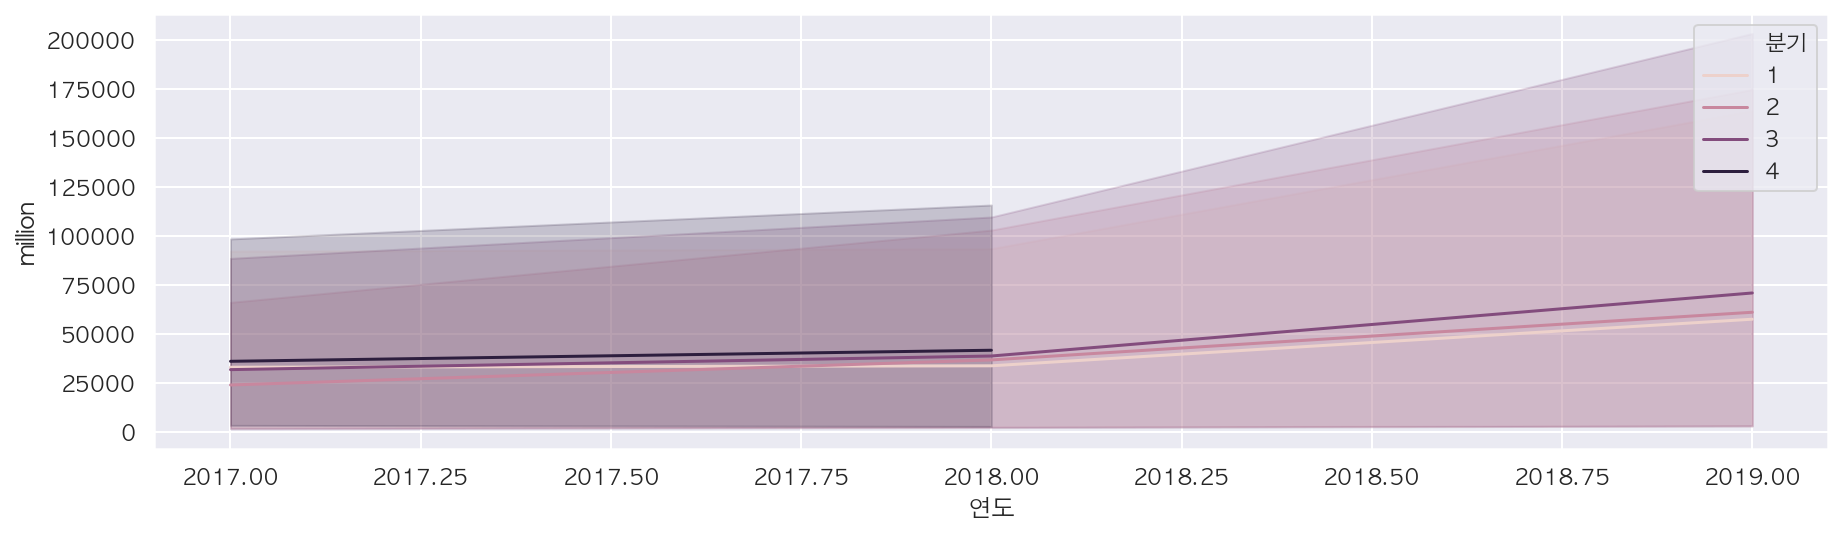

In [18]:
df_cosmetic = df[(df["상품군별"] == "화장품")]
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_cosmetic, x="연도", y="million", hue="분기")

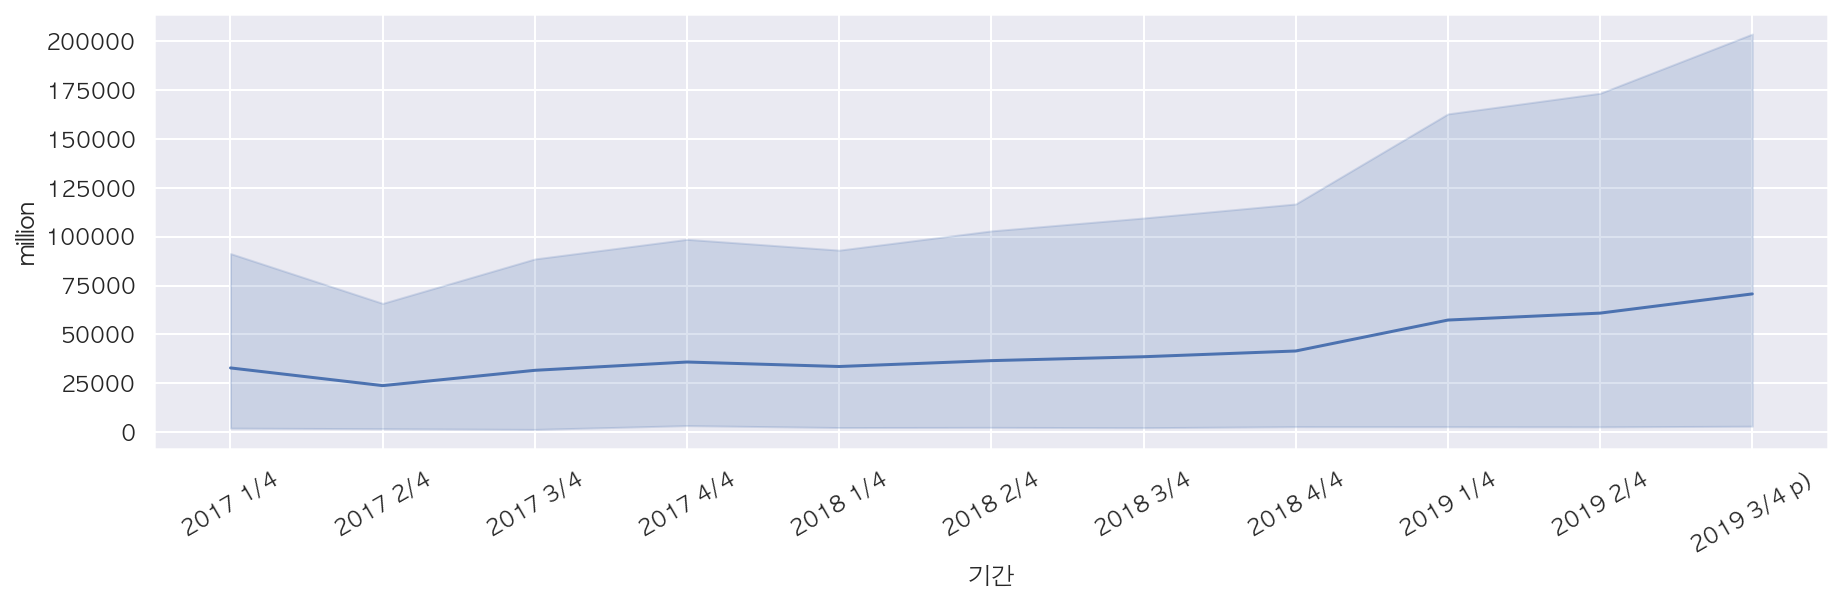

In [19]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="million")

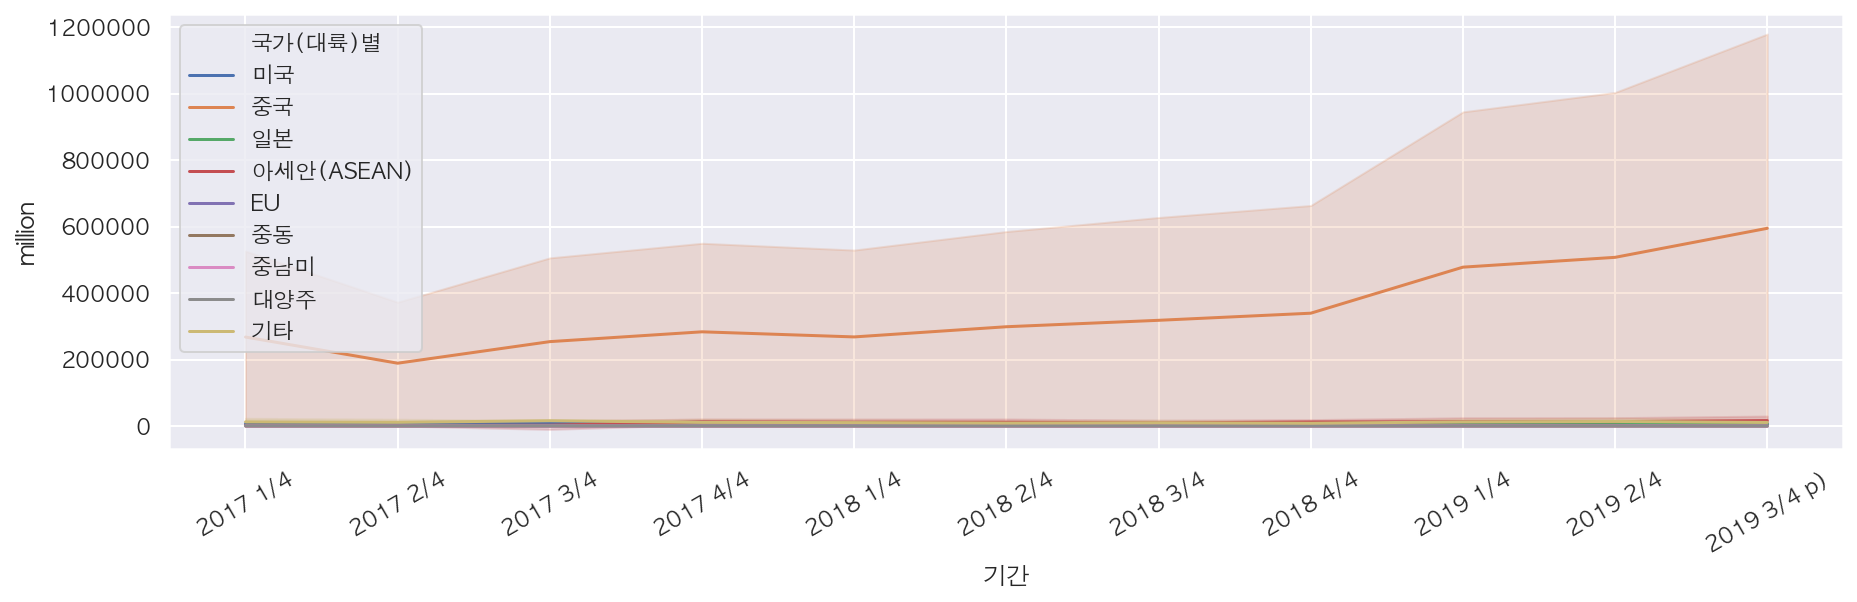

In [20]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="million", hue="국가(대륙)별")

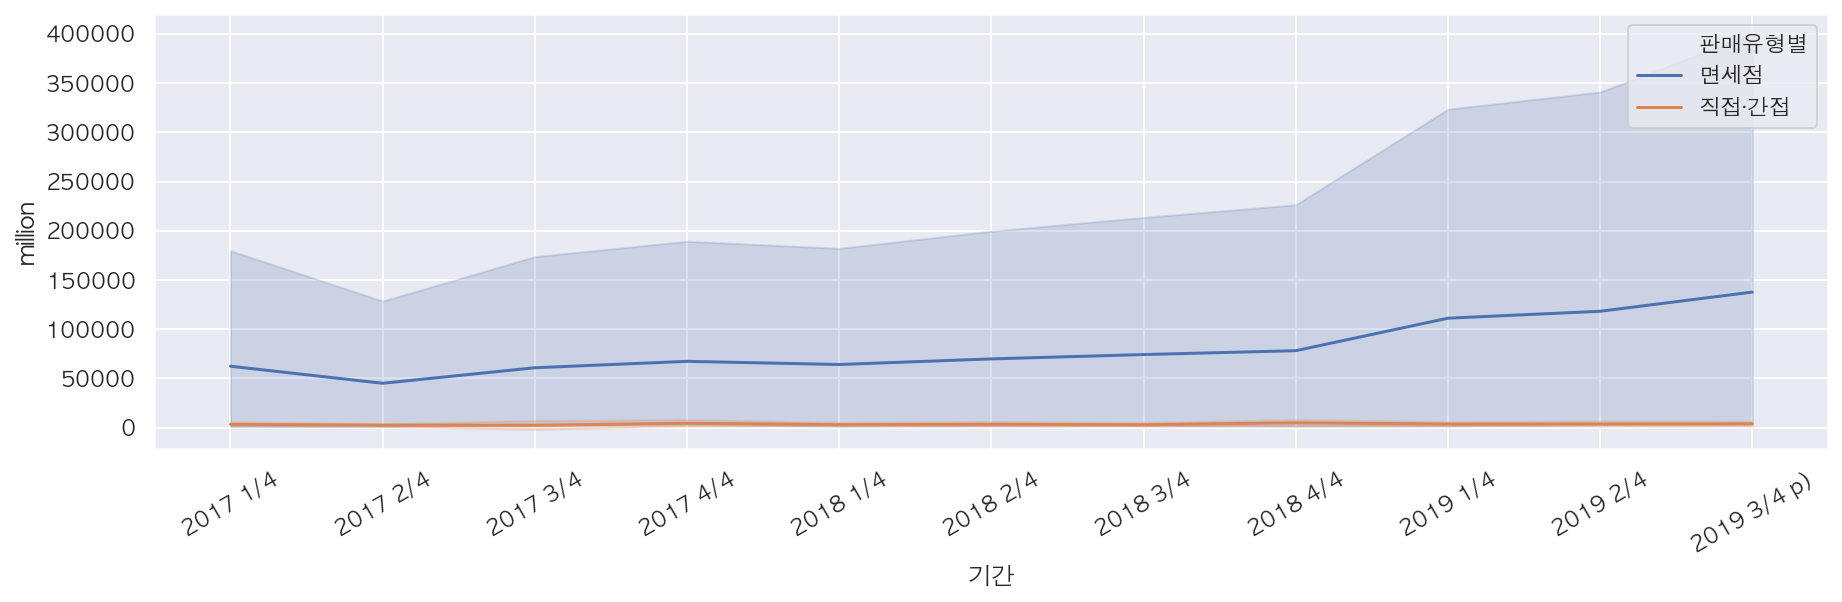

In [21]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="million", hue="판매유형별")

## 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

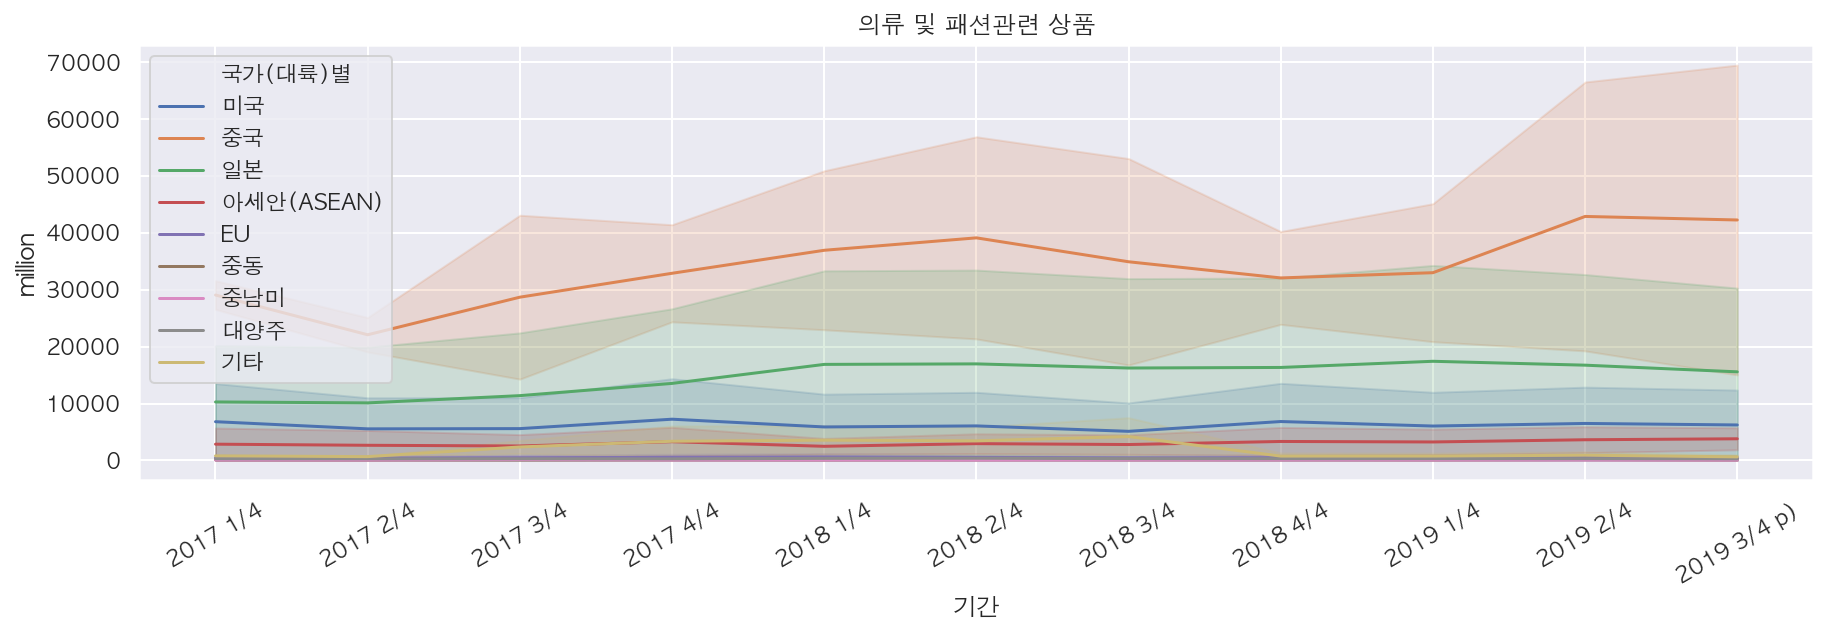

In [22]:
df_fashion = df[df["상품군별"].str.contains("의류")]
plt.figure(figsize=(15, 4))
plt.title("의류 및 패션관련 상품")
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="million", hue="국가(대륙)별")

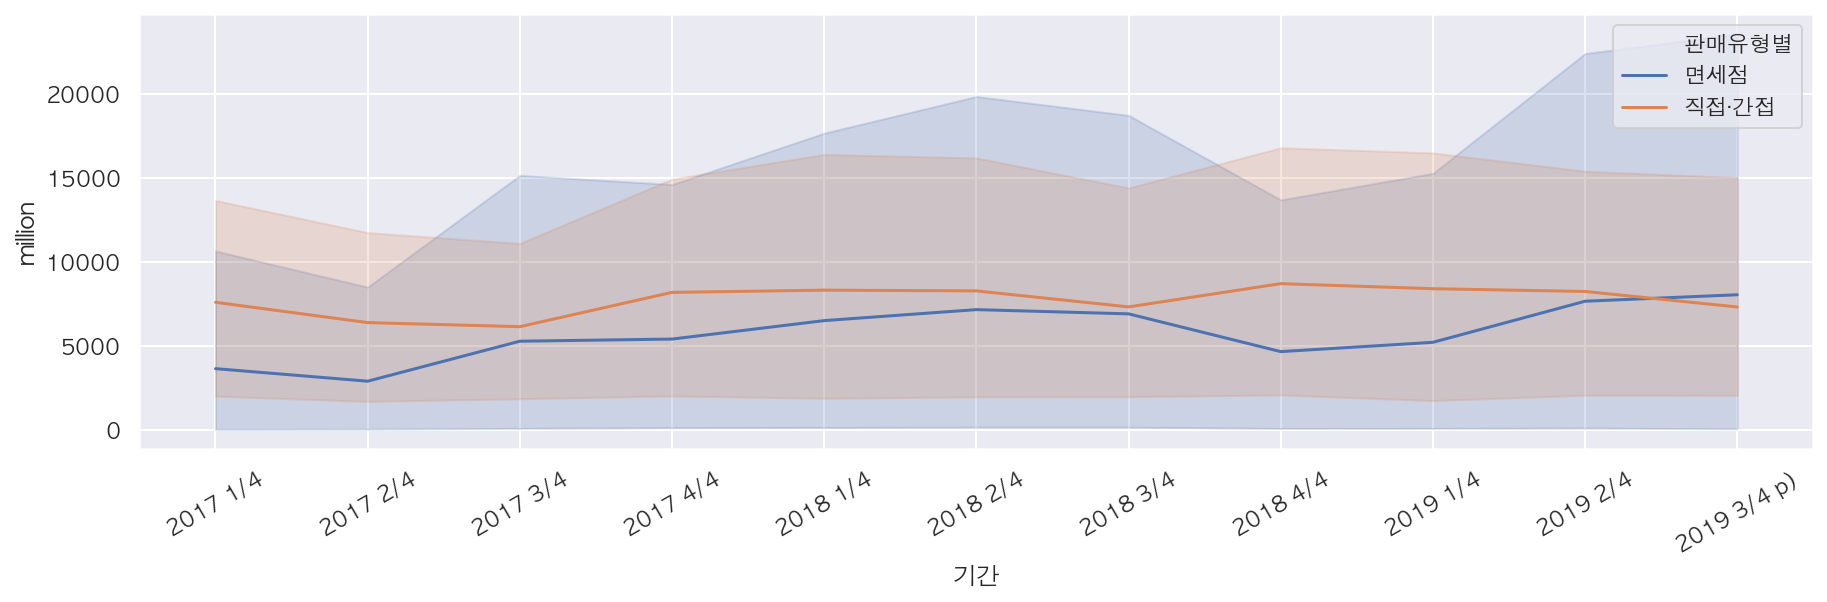

In [23]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="million", hue="판매유형별")

In [24]:
pivot = df_fashion.pivot_table(index="국가(대륙)별", values="million", columns="연도", aggfunc="sum")
pivot

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
EU,0.0,0.0,0.0,3736.0,4102.0,2833.0
기타,0.0,0.0,0.0,14387.0,23893.0,4600.0
대양주,0.0,0.0,0.0,2266.0,2721.0,1762.0
미국,0.0,0.0,0.0,50353.0,47774.0,37527.0
아세안(ASEAN),0.0,0.0,0.0,22671.0,23086.0,21343.0
일본,0.0,0.0,0.0,90584.0,132808.0,99432.0
중국,0.0,0.0,0.0,225407.0,285998.0,236203.0
중남미,0.0,0.0,0.0,762.0,576.0,419.0
중동,0.0,0.0,0.0,772.0,879.0,682.0


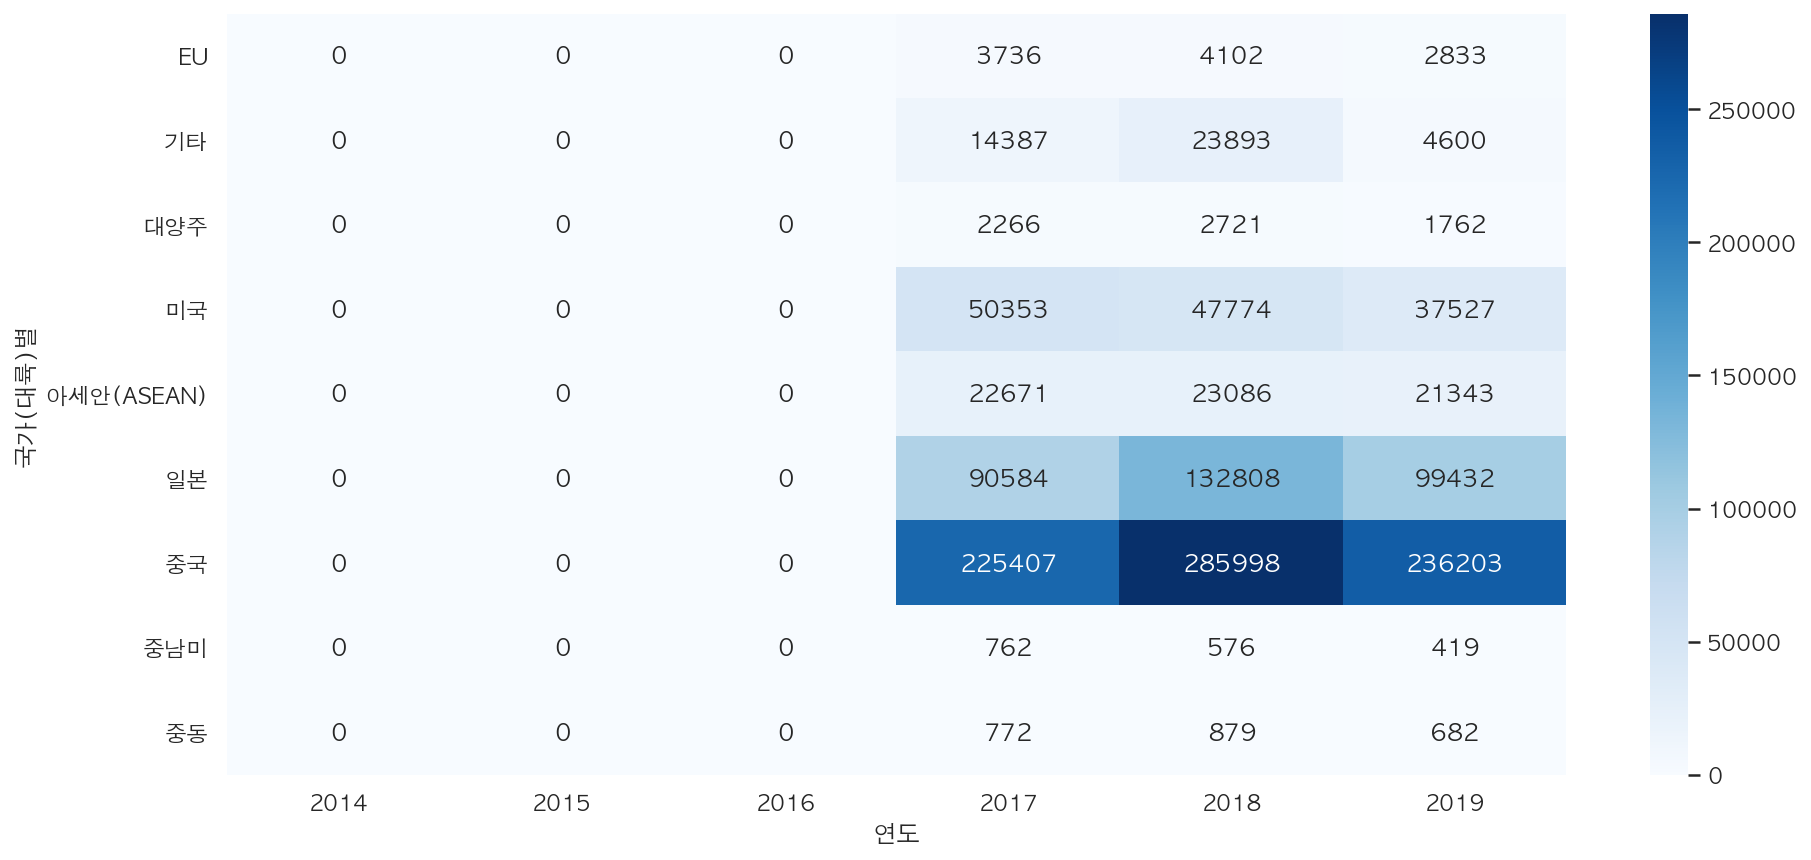

In [25]:
plt.figure(figsize=(15, 7))
sns.heatmap(pivot, cmap="Blues", annot=True, fmt=".0f")

## 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

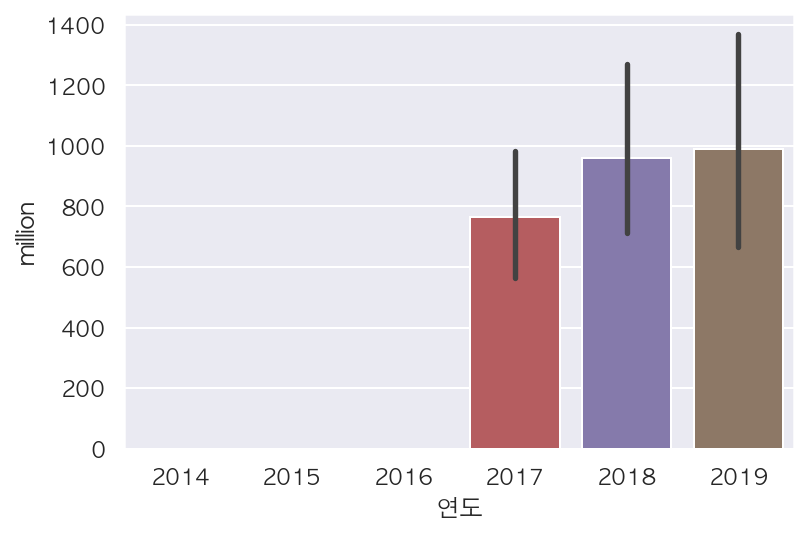

In [26]:
sns.barplot(x="연도", y="million", data=df_sub)

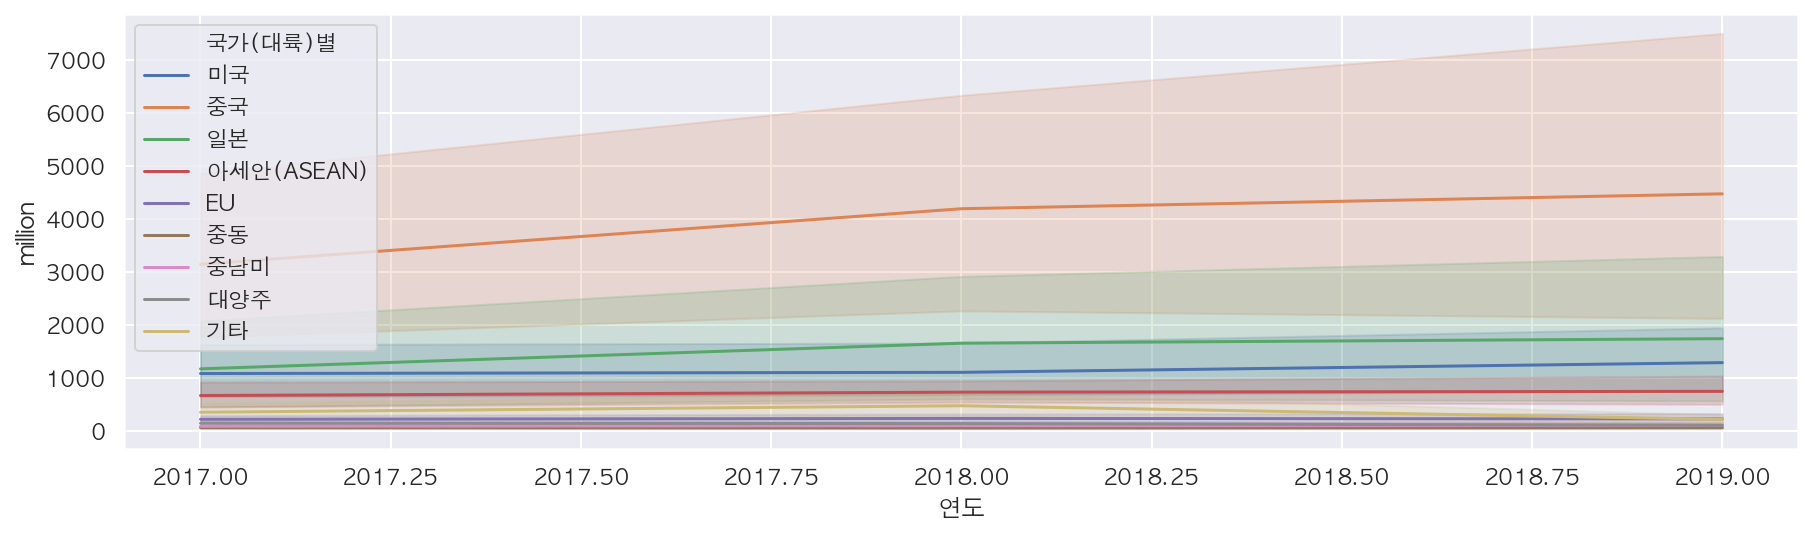

In [27]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="연도", y="million", data=df_sub, hue="국가(대륙)별")

* lengend를 그래프의 밖에 그리기 : [matplotlib - Move legend outside figure in seaborn tsplot - Stack Overflow](https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)

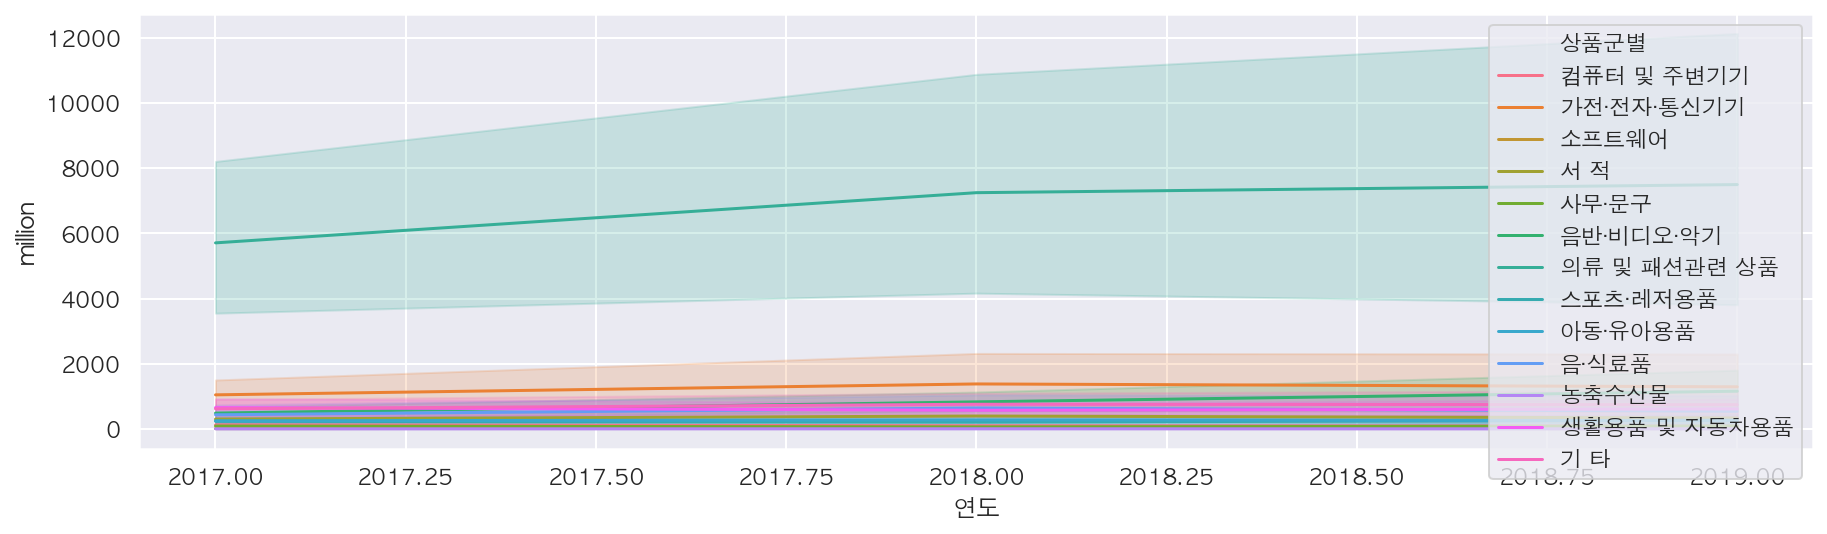

In [28]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="연도", y="million", data=df_sub, hue="상품군별")